# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import imageio
import matplotlib.pyplot as plt
import sklearn


# SET PATH 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Kaggle"

In [4]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [5]:
project_path = "/content/drive/MyDrive/Kaggle/Data Set/captured"

# USING COMPUTER VISION LIBRARY TO LOAD AND PREPROCESS THE IMAGES

picture shape: (720, 1280, 3)
picture matrix: 
 [[[51 39 39]
  [50 35 38]
  [53 37 40]
  ...
  [70 27 46]
  [68 27 45]
  [65 26 44]]

 [[46 34 38]
  [47 32 37]
  [50 33 41]
  ...
  [69 28 46]
  [67 26 44]
  [67 26 44]]

 [[51 34 42]
  [50 30 39]
  [53 33 42]
  ...
  [67 26 44]
  [67 26 44]
  [66 23 42]]

 ...

 [[61 23 22]
  [61 22 23]
  [60 21 24]
  ...
  [70 20 23]
  [68 16 20]
  [68 16 18]]

 [[62 22 22]
  [63 25 24]
  [60 22 21]
  ...
  [64 14 17]
  [64 13 18]
  [65 14 19]]

 [[63 23 21]
  [64 24 22]
  [60 22 19]
  ...
  [65 15 18]
  [64 13 20]
  [66 15 24]]]


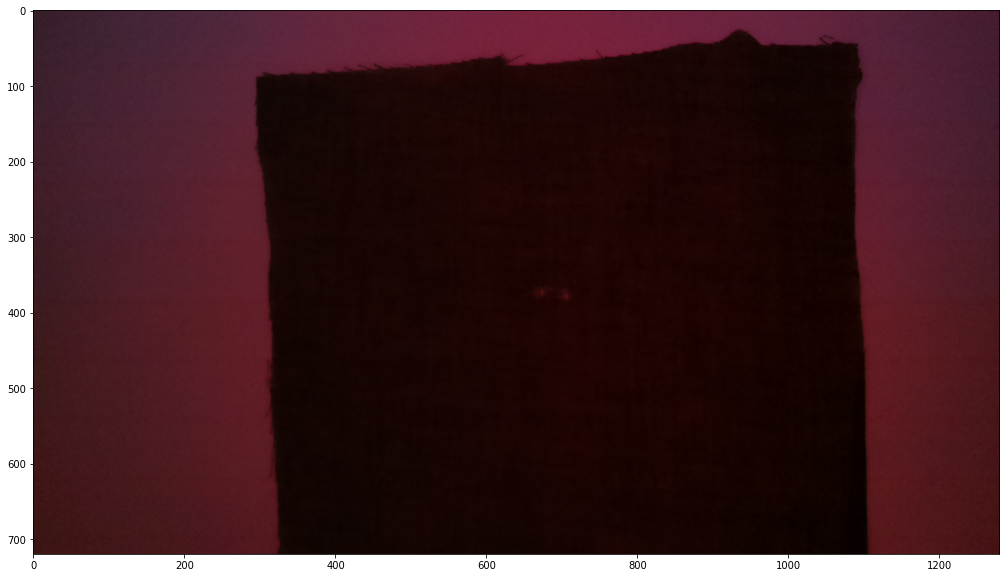

In [6]:
# load a picture
pic="/content/drive/MyDrive/Kaggle/Data Set/captured/Hole/hole_2018-10-11 13_25_54.995114.jpg"
im = imageio.imread(pic)
print("picture shape: {}".format(im.shape))
print("picture matrix: \n {}".format(im))
# set display size
plt.figure(figsize=(20,10))
plt.imshow(im, cmap='gray')
plt.show()

In [7]:
import cv2
def load_file(file_path, label):
    # Include the project path
    
    
    # Declare the folder name
    folder_name = file_path.split("/")[-1]
    
    # Declare output list
    out_list = []
    
    # Load every file .png format
    for image_path in glob.glob(file_path + "/*.jpg"):
        # Read image file
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image= cv2.resize(image,(224,224))
        
        # Declare temporary dict dtype
        temp = {}
        
        # Set the file name
        temp["name"] = image_path.split("/")[-1]
        
        # Set the file label, 0 for non defect. 1 for defect
        temp["label"] = label
        # There are somes images are tensor dtype
        # Thus I fix by selecting only a tensor index zero
        try:   
            temp["data"] = image[:,:,0].astype("int") 
        except:
            # Normal case
            temp["data"] = image.astype("int")
        
        # Append temp into output list
        out_list.append(temp)
    
    # Print process status by checking size of output list
    if len(out_list) == 0:
        print("loading files from folder: {} is   failed".format(folder_name))
    else:
        print("loading file from folder: {} is successful".format(folder_name))
    
    # Convert list into numpy array dtype
    return np.array(out_list)

# LOAD ImAGeS

In [8]:
Hole = project_path + "/Hole"
Lines =  project_path + "/Lines"



# TARGET OUTPUT Hole = 1 and Line = 0

In [9]:
Hole_images = load_file(file_path=Hole, label=1)
Lines_images = load_file(file_path=Lines, label=0)


loading file from folder: Hole is successful
loading file from folder: Lines is successful


# TOTAL NUMBER OF IMAGES FOR BOTH Classes

In [10]:
print("Hole.shape: {}\nLines.shape: {}\n".format(Hole_images.shape, Lines_images.shape))

Hole.shape: (1124,)
Lines.shape: (1244,)



In [11]:
np.random.shuffle(Hole_images)
np.random.shuffle(Lines_images)

In [12]:
class_size = Hole_images.shape[0] if Hole_images.shape[0] <= Lines_images.shape[0] else Lines_images.shape[0]
class_size

1124

In [13]:
dataset = np.concatenate((Hole_images[:class_size], Lines_images[:class_size]))

In [14]:
X = np.empty([dataset.shape[0], 224, 224]).astype(int)

In [15]:
y = np.empty(dataset.shape[0]).astype(int)

In [16]:
for i in range(dataset.shape[0]):
    X[i] = dataset[i]["data"]
    y[i] = dataset[i]["label"]

In [17]:
X = X.reshape(X.shape[0], 224, 224, 1)

# Unique Images in Both Categories

In [18]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1124, 1124]))